# Imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = os.path.join(os.getcwd(), "originalData")
df = pd.read_csv(os.path.join(data_path, "new_data.csv"), encoding="latin1" )

In [3]:
df.head()

,Brewer,Name,Alc,Country,Rating,price
0,Thisted bryghus,Classic,4.6,denmark,6,NaN
1,Thisted bryghus,Økologiks Humle,5.8,denmark,7,NaN
2,Thisted bryghus,Jack & beer,8.0,denmark,7,NaN
3,Thisted bryghus,Limfjords porter,7.9,denmark,6,NaN
4,Thisted bryghus,Limfjordes porter Whisky fad 49,8.5,denmark,8,NaN


# Plots

         index  Country
0      denmark      109
1       german       19
2      belgian       16
3      england        5
4        italy        3
5          usa        2
6       poland        1
7       mexico        1
8      estonia        1
9       Czech         1
10       china        1
11  netherland        1
['denmark', 'german', 'belgian', 'england']
       Country    Rating
0       Czech   6.000000
1      belgian  7.250000
2        china  4.000000
3      denmark  6.110092
4      england  6.200000
5      estonia  3.000000
6       german  6.368421
7        italy  8.000000
8       mexico  4.000000
9   netherland  7.000000
10      poland  1.000000
11         usa  3.000000
   Country    Rating
1  belgian  7.250000
3  denmark  6.110092
4  england  6.200000
6   german  6.368421


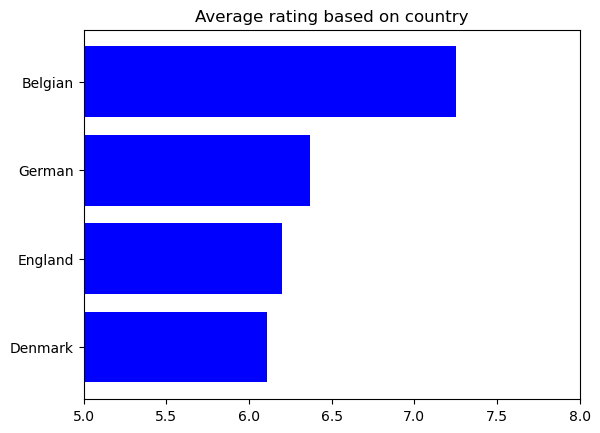

(5, 8)


In [12]:
def avgByCoun():
    keepers = df.copy(deep=True)
    keepers = keepers['Country'].value_counts().reset_index()
    print(keepers)
    keepers = keepers[keepers['Country'] > 3]
    keepers = list(keepers.pop('index'))
    print(keepers)

    df_avgByCoun = df.groupby(['Country'])['Rating'].mean().reset_index()
    print(df_avgByCoun)
    df_avgByCoun = df_avgByCoun[df_avgByCoun['Country'].isin(keepers)]
    print(df_avgByCoun)
    df_avgByCoun = df_avgByCoun.sort_values(by=['Rating'])
    df_avgByCoun['Country'] = df_avgByCoun['Country'].str.capitalize()
    
    default_x_ticks = (round(min(df_avgByCoun['Rating']))) - 1, (round(max(df_avgByCoun['Rating'])) + 1)
    y = list(df_avgByCoun.pop('Country'))
    x = list(df_avgByCoun.pop('Rating'))
    plt.barh(width=x, y=y, color = 'Blue')
    plt.xlim(default_x_ticks)
    plt.title("Average rating based on country")
    plt.show()
    return default_x_ticks

print(avgByCoun())

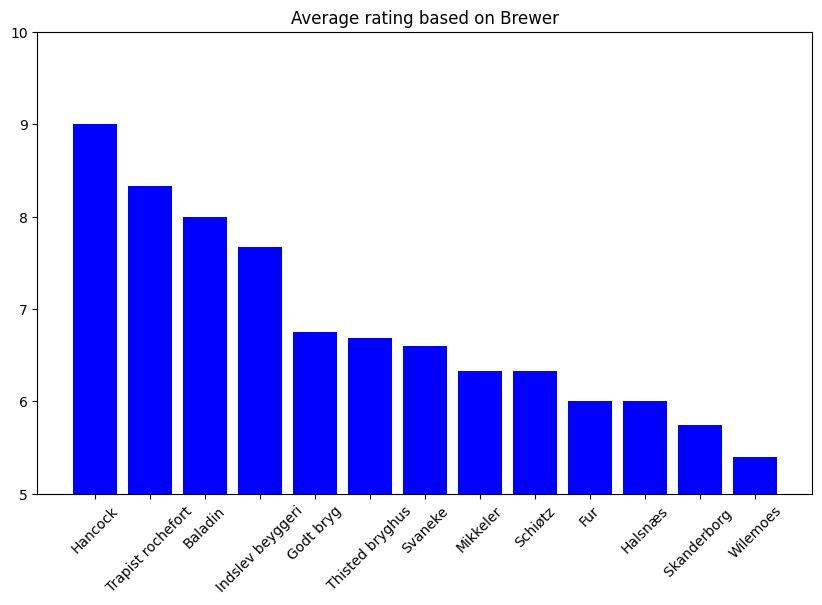

In [ ]:
def avgByBrew():
    keepers = df.copy(deep=True)
    keepers = keepers['Brewer'].value_counts().reset_index()
    keepers = keepers[keepers['count'] > 2]
    keepers = list(keepers.pop('Brewer'))
    keepers.remove('na')

    df_avgByCoun = df.groupby(['Brewer'])['Rating'].mean().reset_index()
    df_avgByCoun = df_avgByCoun[df_avgByCoun['Brewer'].isin(keepers)]
    df_avgByCoun = df_avgByCoun.sort_values(by=['Rating'], ascending=False)
    df_avgByCoun['Brewer'] = df_avgByCoun['Brewer'].str.capitalize()
    
    x = list(df_avgByCoun.pop('Brewer'))[-15:]
    y = list(df_avgByCoun.pop('Rating'))[-15:]
    plt.figure(figsize=(10,6))
    plt.bar(x=x, height=y, color = 'Blue')
    plt.title("Average rating based on Brewer")
    plt.ylim((5,10))
    plt.xticks(rotation = 45)
    plt.show()

avgByBrew()


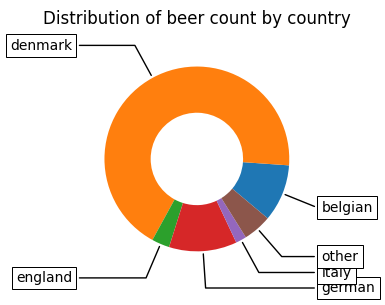

In [ ]:
def donoutChart():
    fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
    data = df.copy(deep=True)
    data = data['Country'].value_counts().reset_index()
    data = data.sort_values(by=['count'], ascending=False)
    data.loc[data['count'] < 3, 'Country'] = "other"
    data = data.groupby(['Country'])['count'].sum().reset_index()
    labels = list(data.pop('Country'))
    count = list(data.pop('count'))
    wedges, texts = ax.pie(count, wedgeprops=dict(width=0.5), startangle=-40)

    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
        bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
            horizontalalignment=horizontalalignment, **kw)

    ax.set_title("Distribution of beer count by country", y=1.05)
    plt.show()

donoutChart()

In [ ]:
def getBrewerCont():
    data = df.copy(deep=True)
    return data['Brewer'].unique().size
getBrewerCont()


array(['Thisted bryghus', 'Guinness', 'Marstons', 'Carlsberg ', 'Tuborg',
       'Svaneke', 'Wilemoes', 'Dansk', 'Erdinger', 'Schiøtz', 'Halsnæs',
       'Pauliner', 'Berliner', 'Märkischer Landmann', 'Biermischgetränk',
       'Czech ', 'Ørbæk', 'Kaiserdom', 'Jacobsen', 'Congerlo', 'Mikkeler',
       'Mercurial', 'na', 'Skovlysten', 'Baladin', 'Trapist Rochefort',
       'Braunstein', 'BB', nan, 'Midtfyns brghus', 'Bitburger', 'Faxe',
       'Refsvindinge ', 'Blance ', 'Albini', 'Godt bryg', 'Frejdahl',
       'Amager bryghus', 'Nørrebro bryghus', 'König', 'Innis & Gunn',
       'Robinson ', 'Fur', 'Herreford ', 'Littrup', 'Christiania',
       'Cerveza', 'Budweisser', 'Steen brugge', 'Alfheim', 'Corona',
       'Warsteiner', 'Hansen Braueri', 'Tennents', 'Aura', 'Plzeñ',
       'Keizer Karl', 'Affligem', 'Skanderborg ', 'Kloster', 'Raven',
       'Gouden', 'Vestfyen', 'Refsvindinge', 'Hancock', 'Rørvig Brygus',
       'Bryghuset solvang', 'To Øl', 'Hertog Jan', 'Nibe', 'Kwak',
      